In [6]:
import tensorflow as tf
import sys
sys.path.append('/nas/longleaf/home/siyangj/NiftyNet/')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import SimpleITK as sitk

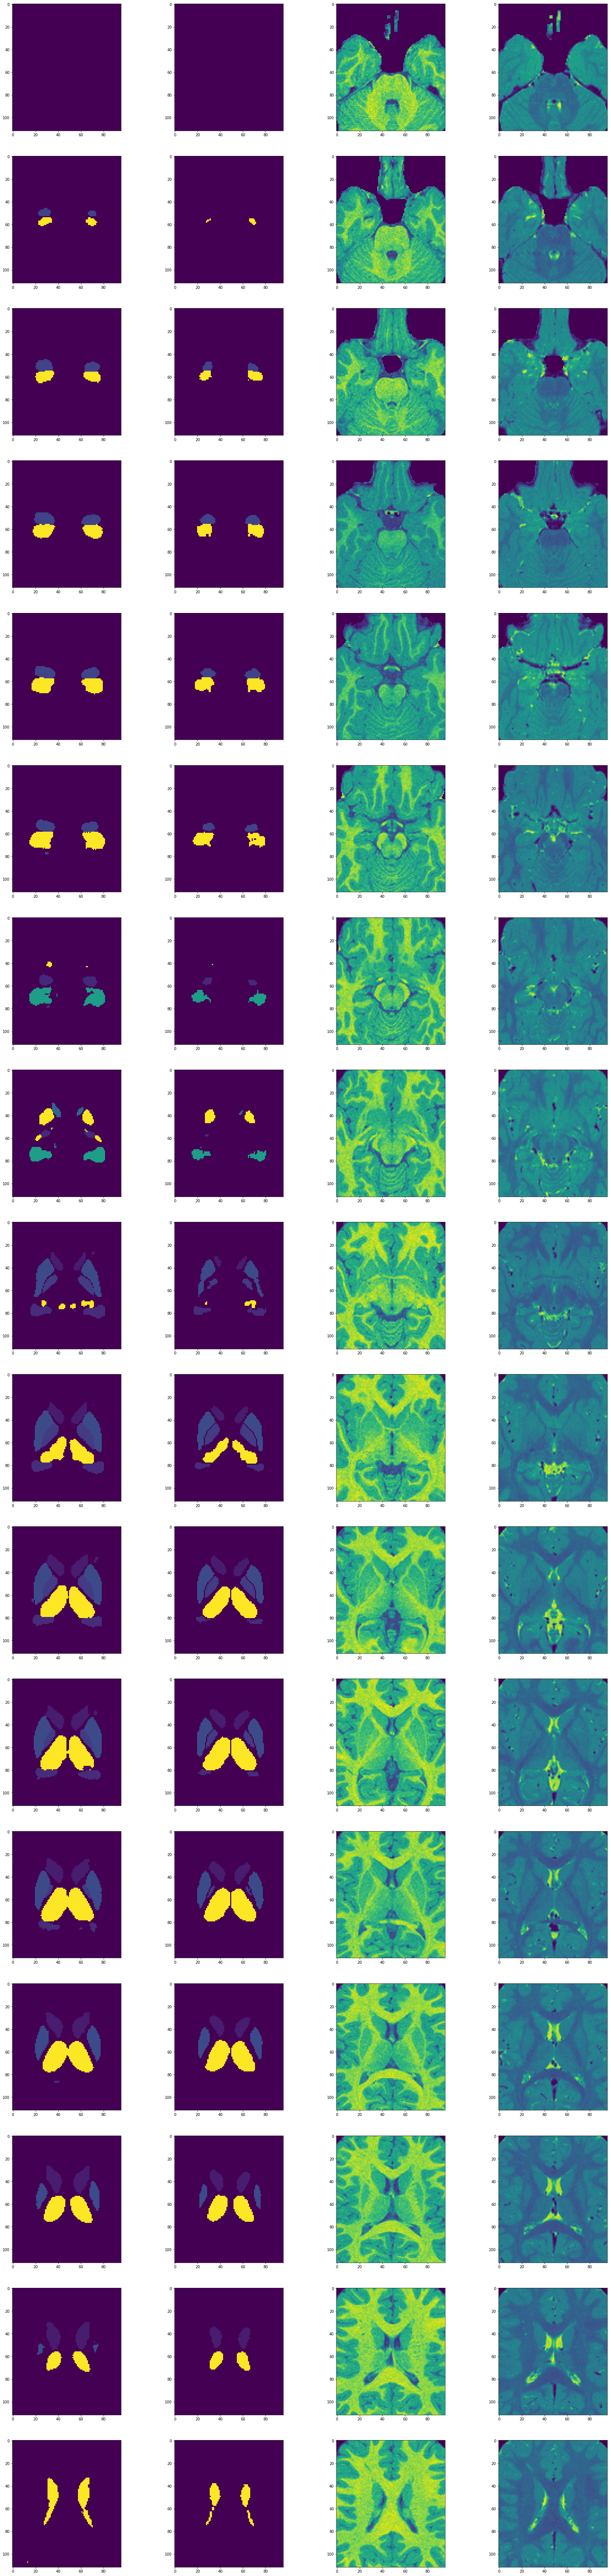

In [3]:
inf_dir = '/proj/NIRAL/users/hanwang/model_0124-weight/inference_14700/'

data_dir = '/proj/NIRAL/users/hanwang/trainingData-symmetric/'

subject_ID = '376852_V24'
inf_pre = ''
inf_suf = '_niftynet_out.nii.gz'
seg_pre = 'label_'
seg_suf = '_t1w.nrrd'
T1_pre = 'atlas_'
T1_suf = '_t1w.nrrd'
T2_pre = 'atlas_'
T2_suf = '_t2w.nrrd'

inf_path = inf_dir + inf_pre + subject_ID + inf_suf
seg_path = data_dir + seg_pre + subject_ID + seg_suf
T1_path = data_dir + T1_pre + subject_ID + T1_suf
T2_path = data_dir + T2_pre + subject_ID + T2_suf

inf = sitk.GetArrayFromImage(sitk.ReadImage(inf_path)).squeeze()
seg = sitk.GetArrayFromImage(sitk.ReadImage(seg_path)).squeeze()
T2 = sitk.GetArrayFromImage(sitk.ReadImage(T2_path)).squeeze()
T1 = sitk.GetArrayFromImage(sitk.ReadImage(T1_path)).squeeze()

i = 70
js = np.arange(20,70,3)
jlength = len(js)

f,axes = plt.subplots(jlength,4,figsize=(30,int(30*jlength/4)))

for i in np.arange(jlength): 
    axes[i][0].imshow(inf[js[i],:,:])
    axes[i][1].imshow(seg[js[i],:,:])
    axes[i][2].imshow(T1[js[i],:,:])
    axes[i][3].imshow(T2[js[i],:,:])

In [4]:
import sklearn as skl
c_mat = skl.metrics.confusion_matrix(seg.flatten(),inf.flatten())
p_mat = c_mat.T / c_mat.astype(np.float).sum(axis=1)

In [8]:
np.where(seg==0)

(array([ 0,  0,  0, ..., 95, 95, 95]),
 array([  0,   0,   0, ..., 111, 111, 111]),
 array([ 0,  1,  2, ..., 93, 94, 95]))

In [5]:
c_mat.astype(np.float).sum(axis=1)

array([990817.,   2051.,   7548.,   5915.,   2418.,   9564.,  13879.])

In [7]:
p_mat.T

array([[9.82010805e-01, 2.21837130e-03, 4.43270553e-03, 5.25626831e-03,
        1.07487054e-03, 2.97027604e-03, 2.03670304e-03],
       [9.75134081e-04, 9.94636763e-01, 0.00000000e+00, 4.38810336e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.62427133e-04, 0.00000000e+00, 9.99337573e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.38123415e-03, 9.46745562e-03, 0.00000000e+00, 9.87151310e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        9.96691481e-01, 3.30851944e-03, 0.00000000e+00],
       [6.27352572e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        9.41028858e-04, 9.98431619e-01, 0.00000000e+00],
       [1.38338497e-02, 7.13307875e-03, 0.00000000e+00, 4.25102673e-03,
        0.00000000e+00, 0.00000000e+00, 9.74782045e-01]])

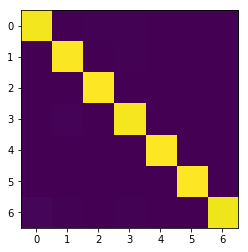

In [6]:
plt.imshow(p_mat.T)

In [52]:
np.where(np.logical_and(inf==10,seg==8))

(array([43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 45, 45, 45,
        45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45,
        45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46,
        46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
        47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
        47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
        47, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49,
        49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
        49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
        49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
        49, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 51, 51,
        51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51,
        51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51,
        51, 

In [42]:
np.set_printoptions(precision=1)
p_mat.T * 100

array([[1.0e+02, 1.0e-03, 2.2e-02, 3.9e-03, 5.9e-02, 1.1e-03, 6.4e-03,
        1.3e-02, 4.0e-04, 2.5e-02, 1.2e-01, 3.0e-04, 9.7e-03, 2.0e-04],
       [1.0e+02, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00],
       [1.0e+02, 0.0e+00, 9.8e-02, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 2.0e-01, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00],
       [9.8e+01, 0.0e+00, 2.4e-01, 1.5e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        1.3e-01, 0.0e+00, 5.3e-02, 0.0e+00, 2.6e-02, 0.0e+00, 0.0e+00],
       [9.3e+01, 0.0e+00, 0.0e+00, 0.0e+00, 5.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 1.7e+00, 0.0e+00, 0.0e+00, 0.0e+00],
       [9.9e+01, 0.0e+00, 0.0e+00, 2.0e-01, 0.0e+00, 0.0e+00, 3.4e-02,
        6.8e-02, 0.0e+00, 1.7e-01, 4.7e-01, 0.0e+00, 0.0e+00, 0.0e+00],
       [9.2e+01, 0.0e+00, 0.0e+00, 5.8e-01, 1.7e-01, 6.9e+00, 0.0e+00,
        3.4e-02, 0.0e+00, 0.0e+00, 1.4e-01, 0.0e+00, 0.0e+00, 0.0e+00],

In [7]:
np.set_printoptions(threshold=np.inf)
np.where(seg>0)[0]

array([22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25,
       25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
       25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
       25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
       25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
       25, 25, 25, 25, 25

In [51]:
eq_mask = np.logical_and(inf==seg,seg!=0)
np.where(np.logical_and(seg==8,eq_mask))

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [21]:
np.set_printoptions(threshold=1e4)
np.where(eq_mask)

(array([40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,
        41, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42,
        42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42,
        42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43,
        43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
        43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
        44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44,
        44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44,
        44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44,
        44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44,
        45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45,
        45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45,
        45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45,
        45, 

In [ ]:
m = sitk.ReadImage(inf_path)
a = sitk.GetArrayFromImage(m)
a.shape

In [ ]:
def Dice(pred,true,labels=[0,1,2,3]):
    l = len(labels)
    ret = np.zeros(l)
    for i in range(l):
        lab = labels[i]
        p = pred==lab
        t = true==lab
        ret[i] = 2*np.logical_and(p,t).sum()/(p.sum()+t.sum())
    return ret

In [10]:
Dice(inf,seg,labels=[0,1,3,5,7,9,40])

array([0.99081025, 0.63314711, 0.77431607, 0.68573106, 0.81667231,
       0.86557288, 0.91952695])

In [3]:
inf_dir = "/proj/NIRAL/users/hanwang/model_0128_2e-4/inference_lowerLrfrom14700/137345_V12_niftynet_out.nii.gz"
seg_dir = "/proj/NIRAL/users/hanwang/trainingData-symmetric/label_137345_V12_t1w.nrrd"

In [7]:
inf = sitk.GetArrayFromImage(sitk.ReadImage(inf_dir))
seg = sitk.GetArrayFromImage(sitk.ReadImage(seg_dir))


In [8]:
Dice(inf,seg,labels=[0,1,3,5,7,9,40])

array([0.99280805, 0.62981132, 0.74088886, 0.62395029, 0.8643853 ,
       0.85109253, 0.94455083])